         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94
Columns in the dataset: Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')


c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


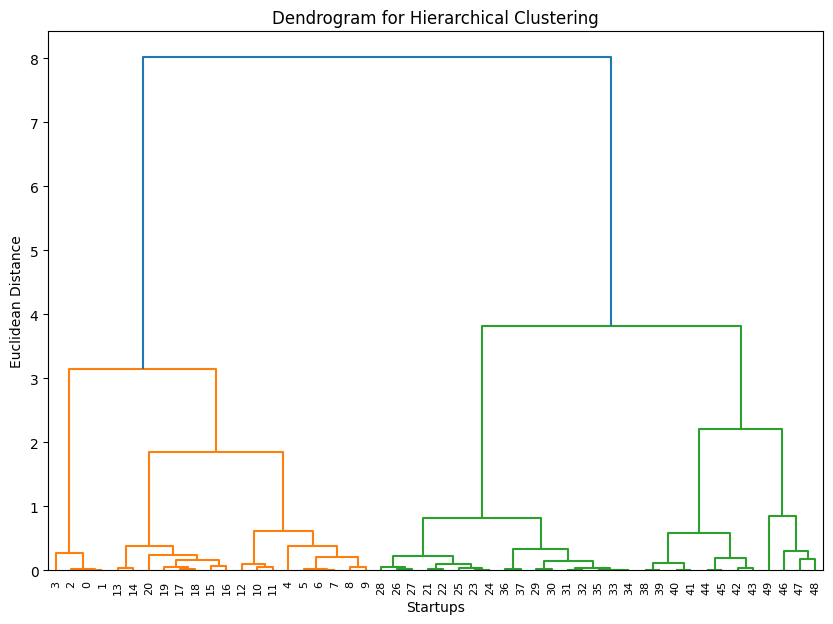

Cluster assignments:


KeyError: "['R&D Spend', 'Administration', 'Marketing Spend'] not in index"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Step 1: Load the dataset
data = pd.read_csv('50_Startups.csv')

# Step 2: Inspect the first few rows to understand the structure
print(data.head())

# Check the column names to see if 'State' or any categorical column exists
print("Columns in the dataset:", data.columns)

# Step 3: Data Preprocessing

# Handle missing values (if any)
# Here, we drop rows with missing values for simplicity
data = data.dropna()

# If there are categorical columns (e.g., 'State'), apply Label Encoding
# The 'State' column is categorical, so we need to encode it
if 'State' in data.columns:
    label_encoder = LabelEncoder()
    data['State'] = label_encoder.fit_transform(data['State'])

# Step 4: Feature Selection
# We focus on the 'PROFIT' column for clustering (you can include more columns if needed)
X = data[['PROFIT']]

# Step 5: Feature Scaling (standardize the data)
# Scaling is particularly important for distance-based algorithms like hierarchical clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply Hierarchical Clustering
# Using Agglomerative Hierarchical Clustering to form clusters (you can adjust the number of clusters)
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model to the scaled data
data['Cluster'] = hc.fit_predict(X_scaled)

# Step 7: Visualize the Dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Startups')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 8: Output the resulting clusters
print("Cluster assignments:")
print(data[['R&D Spend', 'Administration', 'Marketing Spend', 'PROFIT', 'Cluster']].head())

# Optional: Visualize the clusters (if more features are used for clustering, scatter plot can be extended)
plt.scatter(data['PROFIT'], np.zeros_like(data['PROFIT']), c=data['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PROFIT')
plt.title('Hierarchical Clustering of Startups based on PROFIT')
plt.show()
